In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [134]:
files = ['turnstile_160402.csv',
         'turnstile_160409.csv',
         'turnstile_160416.csv',
         'turnstile_160423.csv',
         'turnstile_160430.csv',
         'turnstile_160507.csv',
         'turnstile_160514.csv',
         'turnstile_160521.csv',
         'turnstile_160528.csv', 
         'turnstile_160604.csv',
         'turnstile_160611.csv',
         'turnstile_160618.csv', 
         'turnstile_160625.csv']

mta = pd.DataFrame()
frames = []

for file in files:
    df = pd.read_csv(file)
    frames.append(df)

mta = pd.concat(frames)

In [135]:
mta.columns = [n.lower().strip() for n in mta.columns]

mta['date_time'] = mta['date'] + " " + mta['time']
mta.date_time = pd.to_datetime(mta.date_time, format='%m/%d/%Y %H:%M:%S')


In [136]:
mta.groupby(['c/a', 'unit', 'scp', 'station', 'linename', 'date_time'])\
            .size().sort_values(ascending=False).value_counts()
    
# mta.groupby(['c/a', 'unit', 'scp', 'station', 'linename', 'date_time'], as_index=False).\
# filter(lambda x: len(x) >= 2)

1    2523464
2         51
dtype: int64

In [137]:
mta.sort_values(['c/a', 'unit', 'scp', 'station', 'linename', 'date_time'],\
                inplace=True, ascending=False)
mta.drop_duplicates(subset=['c/a', 'unit', 'scp', 'station', 'date_time'], inplace=True)
mta.groupby(['c/a', 'unit', 'scp', 'station', 'linename', 'date_time'])\
            .size().sort_values(ascending=False).value_counts()


1    2523515
dtype: int64

In [138]:
mta.sort_values('date_time', inplace = True)
mta['ent_diff'] = mta.groupby(['c/a', 'unit', 'scp', 'station', 'linename']).\
entries.transform(lambda x: abs(x - x.shift()))
mta['ex_diff'] = mta.groupby(['c/a', 'unit', 'scp', 'station', 'linename']).\
exits.transform(lambda x: abs(x - x.shift()))

In [139]:
mta['traffic'] = mta.ent_diff + mta.ex_diff
mta.sort_values(['c/a', 'unit', 'scp', 'station', 'linename', 'date_time'], inplace=True)

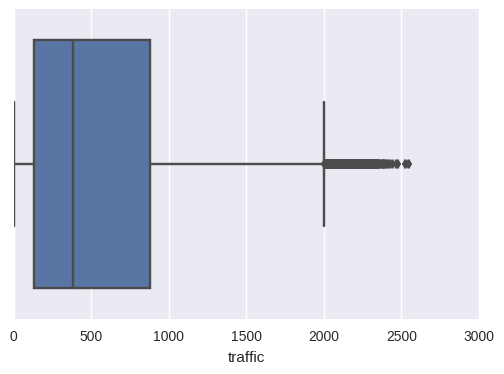

In [140]:
time_sq = mta[(mta.station == 'TIMES SQ-42 ST')]
sns.boxplot(time_sq.traffic[time_sq.traffic < 100000])

In [141]:
mta3000 = mta[(mta.traffic < 3000) ]
mta3000.traffic.describe()
mta3000.sort_values(['traffic']).tail()


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,ent_diff,ex_diff,traffic
95671,N506,R022,00-00-00,34 ST-HERALD SQ,BDFMNQR,IND,05/23/2016,20:00:00,REGULAR,4137036,6672955,2016-05-23 20:00:00,1757.0,1240.0,2997.0
154123,R249,R179,01-00-09,86 ST,456,IRT,04/04/2016,12:00:00,REGULAR,1183712,11522439,2016-04-04 12:00:00,102.0,2895.0,2997.0
149574,R238,R046,00-03-04,GRD CNTRL-42 ST,4567S,IRT,06/14/2016,20:00:00,REGULAR,9236584,9879642,2016-06-14 20:00:00,2140.0,858.0,2998.0
154281,R249,R179,01-00-09,86 ST,456,IRT,04/20/2016,12:00:00,REGULAR,1200700,11674670,2016-04-20 12:00:00,117.0,2882.0,2999.0
157596,R258,R132,00-00-02,125 ST,456,IRT,05/23/2016,17:00:00,REGULAR,2628377,18614742,2016-05-23 17:00:00,1909.0,1090.0,2999.0


In [142]:
final_mta = mta3000.groupby(['station', 'linename', 'date_time'], as_index=False)\
[['traffic']].sum()
final_mta['date'] = final_mta.date_time.apply(lambda x: x.date())
final_mta

,station,linename,date_time,traffic,date
0,1 AV,L,2016-03-26 04:00:00,3137.0,2016-03-26
1,1 AV,L,2016-03-26 08:00:00,1504.0,2016-03-26
2,1 AV,L,2016-03-26 12:00:00,5502.0,2016-03-26
3,1 AV,L,2016-03-26 16:00:00,8825.0,2016-03-26
4,1 AV,L,2016-03-26 20:00:00,10846.0,2016-03-26
5,1 AV,L,2016-03-27 00:00:00,8617.0,2016-03-27
6,1 AV,L,2016-03-27 04:00:00,2996.0,2016-03-27
7,1 AV,L,2016-03-27 08:00:00,1011.0,2016-03-27
8,1 AV,L,2016-03-27 12:00:00,4279.0,2016-03-27
9,1 AV,L,2016-03-27 16:00:00,7125.0,2016-03-27


In [143]:
traffic_sum = final_mta.groupby(['station', 'linename', 'date'], as_index=False)[['traffic']].\
sum().sort_values('traffic', ascending= False)
print traffic_sum.traffic.describe()
traffic_sum


count     42801.000000
mean      19289.095045
std       24770.383982
min           0.000000
25%        6188.000000
50%       11472.000000
75%       22239.000000
max      282012.000000
Name: traffic, dtype: float64


,station,linename,date,traffic
28124,GRD CNTRL-42 ST,4567S,2016-03-31,282012.0
28123,GRD CNTRL-42 ST,4567S,2016-03-30,279249.0
28122,GRD CNTRL-42 ST,4567S,2016-03-29,277801.0
28193,GRD CNTRL-42 ST,4567S,2016-06-08,276619.0
28157,GRD CNTRL-42 ST,4567S,2016-05-03,275709.0
28207,GRD CNTRL-42 ST,4567S,2016-06-22,273699.0
28160,GRD CNTRL-42 ST,4567S,2016-05-06,272946.0
28178,GRD CNTRL-42 ST,4567S,2016-05-24,270013.0
28180,GRD CNTRL-42 ST,4567S,2016-05-26,269132.0
28187,GRD CNTRL-42 ST,4567S,2016-06-02,268554.0


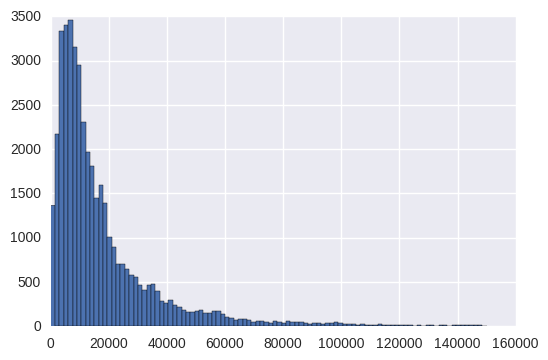

In [144]:
plt.hist(traffic_sum.traffic, bins=100, range=(0,150000));



In [145]:
daily_mean_traffic = final_mta.groupby(['station', 'linename', 'date'], as_index=False)[['traffic']].\
sum().sort_values('traffic', ascending= False)

In [146]:
avg_daily_mean = daily_mean_traffic.groupby(['station', 'linename'], as_index=False)[['traffic']].mean().\
sort_values('traffic', ascending=False).reset_index()
avg_daily_mean

,index,station,linename,traffic
0,310,GRD CNTRL-42 ST,4567S,210072.670330
1,90,34 ST-HERALD SQ,BDFMNQR,201552.000000
2,445,TIMES SQ-42 ST,1237ACENQRS,144006.560440
3,94,34 ST-PENN STA,ACE,134450.989011
4,103,42 ST-PORT AUTH,ACENQRS1237,129871.505495
5,28,14 ST-UNION SQ,LNQR456,121234.978022
6,156,86 ST,456,103570.197802
7,107,47-50 STS ROCK,BDFM,101388.516484
8,287,FLUSHING-MAIN,7,98280.373626
9,126,59 ST COLUMBUS,ABCD1,91826.329670


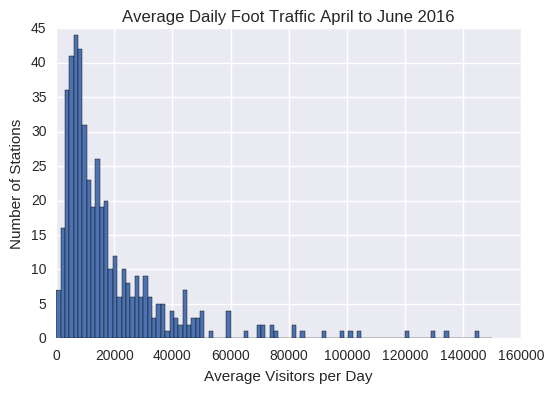

In [147]:

plt.hist(avg_daily_mean.traffic, bins=100, range=(0,150000));
plt.title("Average Daily Foot Traffic April to June 2016")
plt.ylabel("Number of Stations")
plt.xlabel("Average Visitors per Day")

In [148]:
low = avg_daily_mean.traffic.quantile(.7)
high = avg_daily_mean.traffic.quantile(.9)
avg_daily_mean[(avg_daily_mean.traffic >= low) & (avg_daily_mean.traffic <= high)]

,index,station,linename,traffic
48,175,ATL AV-BARCLAY,BDNQR2345,41608.945055
49,131,66 ST-LINCOLN,1,40710.615385
50,82,28 ST,6,40149.857143
51,440,SUTPHIN-ARCHER,EJZ,39479.659341
52,116,51 ST,6,39458.800000
53,148,8 AV,ACEL,39332.362637
54,306,GRAND ST,BD,38733.846154
55,241,CHAMBERS ST,123,37228.945055
56,291,FOREST HILLS 71,EFMR,37169.747253
57,24,14 ST,123FLM,37064.637363
